### Masive Data Assignment
 (second project)
Read, Clean, and prepare the Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Bitcoin Cash Price

#### 1. Read the Data

In [4]:
# Read Bitcoin dataset 
df = pd.read_csv('../data/raw/bitcoin_dataset.csv', parse_dates = ['Date'])
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2009-01-03,0.0,50.0,0.0,0.0,0.0,0.000285,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,50.0,0.0,0.0
1,2009-01-05,0.0,50.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2009-01-07,0.0,50.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2009-01-09,0.0,750.0,0.0,0.0,0.0,0.000215,0.0,1.0,0.0,...,0.0,0.0,14.0,14.0,15.0,14.0,14.0,700.0,0.0,0.0
4,2009-01-11,0.0,7600.0,0.0,0.0,0.0,0.000215,0.0,1.0,0.0,...,0.0,0.0,106.0,106.0,152.0,106.0,106.0,5300.0,0.0,0.0


In [5]:
df.columns

Index(['Date', 'btc_market_price', 'btc_total_bitcoins', 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'],
      dtype='object')

In [6]:
df.isnull().sum()

Date                                                     0
btc_market_price                                         0
btc_total_bitcoins                                       0
btc_market_cap                                           0
btc_trade_volume                                       478
btc_blocks_size                                          0
btc_avg_block_size                                       0
btc_n_orphaned_blocks                                    0
btc_n_transactions_per_block                             0
btc_median_confirmation_time                             0
btc_hash_rate                                            0
btc_difficulty                                           0
btc_miners_revenue                                       0
btc_transaction_fees                                     0
btc_cost_per_transaction_percent                         0
btc_cost_per_transaction                                 0
btc_n_unique_addresses                                  

In [7]:
df.count()

Date                                                   1584
btc_market_price                                       1584
btc_total_bitcoins                                     1584
btc_market_cap                                         1584
btc_trade_volume                                       1106
btc_blocks_size                                        1584
btc_avg_block_size                                     1584
btc_n_orphaned_blocks                                  1584
btc_n_transactions_per_block                           1584
btc_median_confirmation_time                           1584
btc_hash_rate                                          1584
btc_difficulty                                         1584
btc_miners_revenue                                     1584
btc_transaction_fees                                   1584
btc_cost_per_transaction_percent                       1584
btc_cost_per_transaction                               1584
btc_n_unique_addresses                  

as we can see we have in this file 23 columns and each column has 1548 cells, and we have missing data in btc_trade_volume column, (empty cells)

In [8]:
df.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,1584.000000,1.584000e+03,1.584000e+03,1.106000e+03,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1.584000e+03,...,1.584000e+03,1584.000000,1584.000000,1584.000000,1.584000e+03,1584.000000,1584.000000,1.584000e+03,1.584000e+03,1.584000e+03
mean,334.095935,9.858289e+06,5.045619e+09,7.163810e+06,25575.157921,0.275350,0.332702,524.398118,6.325609,5.922701e+05,...,1.936839e+03,9.991641,146279.104167,79702.557449,4.995044e+07,73023.962121,48678.102273,1.341287e+06,1.754802e+05,8.198947e+07
std,609.052564,5.170361e+06,9.932860e+09,1.825481e+07,35584.788312,0.323961,0.803367,624.657294,5.235022,1.311404e+06,...,4.483039e+04,12.749557,175945.983749,93616.287421,6.764581e+07,93160.749994,62017.952608,2.349160e+06,2.430975e+05,1.749650e+08
min,0.000000,5.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.897500,5.609512e+06,4.942691e+06,0.000000e+00,10.000000,0.004050,0.000000,12.000000,0.000000,4.656278e-01,...,1.089992e+00,2.015895,2829.000000,2046.750000,3.124270e+05,2046.750000,1539.500000,1.733491e+05,5.297075e+04,4.475075e+04
50%,97.235000,1.111709e+07,1.105880e+09,2.695221e+05,7364.000000,0.133423,0.000000,287.500000,7.400000,7.760397e+01,...,2.571138e+00,6.592404,53019.000000,49466.000000,1.725231e+07,24052.500000,22898.000000,8.295208e+05,1.493515e+05,1.516898e+07
75%,446.337500,1.435121e+07,6.437710e+09,6.763820e+06,38520.750000,0.446481,0.000000,792.000000,9.316667,3.738849e+05,...,6.787051e+00,10.758279,237152.500000,115646.250000,7.468435e+07,108932.750000,61813.500000,1.801741e+06,2.449880e+05,8.279745e+07
max,4748.255000,1.654439e+07,7.851738e+10,1.984916e+08,131365.560971,0.998177,5.000000,2235.977273,47.733333,8.215055e+06,...,1.570000e+06,90.202095,687290.000000,367710.000000,2.520994e+08,354151.000000,256495.000000,4.599222e+07,5.313161e+06,1.422580e+09


In [9]:
# General Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 24 columns):
Date                                                   1584 non-null datetime64[ns]
btc_market_price                                       1584 non-null float64
btc_total_bitcoins                                     1584 non-null float64
btc_market_cap                                         1584 non-null float64
btc_trade_volume                                       1106 non-null float64
btc_blocks_size                                        1584 non-null float64
btc_avg_block_size                                     1584 non-null float64
btc_n_orphaned_blocks                                  1584 non-null float64
btc_n_transactions_per_block                           1584 non-null float64
btc_median_confirmation_time                           1584 non-null float64
btc_hash_rate                                          1584 non-null float64
btc_difficulty                         

In [10]:
#check if the dataset is duplicated
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1579    False
1580    False
1581    False
1582    False
1583    False
Length: 1584, dtype: bool

#### 2. Cleaning Data

In [10]:
# Replacing missing data with NaN
df.replace(' ', np.nan,inplace=True)
df[df['btc_trade_volume'].isnull()].head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
449,2011-06-20,17.3500,6605900.0,1.146124e+08,NaN,148.0,0.020049,0.0,63.0,0.000000,...,1.388642,17.877669,23113.0,11278.0,804159.0,11278.0,8032.0,5.015070e+06,836861.0,14519535.0
450,2011-06-22,15.0500,6630950.0,9.979580e+07,NaN,155.0,0.016320,0.0,71.0,0.000000,...,11.033649,17.225305,24881.0,11810.0,825121.0,11810.0,7789.0,3.232504e+06,122507.0,1843731.0
451,2011-06-24,16.7501,6654850.0,1.114694e+08,NaN,163.0,0.017697,0.0,57.0,0.000000,...,11.319272,18.075485,22763.0,11134.0,846767.0,11134.0,7349.0,4.528661e+06,106146.0,1777963.0
859,2013-09-17,127.5600,11713200.0,1.494136e+09,NaN,10414.0,0.174924,0.0,255.0,7.300000,...,3.273634,8.687958,61057.0,66291.0,23955832.0,42021.0,25426.0,6.727934e+05,137920.0,17593089.0
860,2013-09-19,124.1000,11721850.0,1.454682e+09,NaN,10468.0,0.133412,0.0,316.0,6.116667,...,2.267940,10.486791,66398.0,59004.0,24079219.0,41152.0,27719.0,7.850827e+05,219847.0,27283020.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 24 columns):
Date                                                   1584 non-null datetime64[ns]
btc_market_price                                       1584 non-null float64
btc_total_bitcoins                                     1584 non-null float64
btc_market_cap                                         1584 non-null float64
btc_trade_volume                                       1106 non-null float64
btc_blocks_size                                        1584 non-null float64
btc_avg_block_size                                     1584 non-null float64
btc_n_orphaned_blocks                                  1584 non-null float64
btc_n_transactions_per_block                           1584 non-null float64
btc_median_confirmation_time                           1584 non-null float64
btc_hash_rate                                          1584 non-null float64
btc_difficulty                         

In [11]:
df[df['btc_trade_volume'].isnull()].head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
449,2011-06-20,17.3500,6605900.0,1.146124e+08,NaN,148.0,0.020049,0.0,63.0,0.000000,...,1.388642,17.877669,23113.0,11278.0,804159.0,11278.0,8032.0,5.015070e+06,836861.0,14519535.0
450,2011-06-22,15.0500,6630950.0,9.979580e+07,NaN,155.0,0.016320,0.0,71.0,0.000000,...,11.033649,17.225305,24881.0,11810.0,825121.0,11810.0,7789.0,3.232504e+06,122507.0,1843731.0
451,2011-06-24,16.7501,6654850.0,1.114694e+08,NaN,163.0,0.017697,0.0,57.0,0.000000,...,11.319272,18.075485,22763.0,11134.0,846767.0,11134.0,7349.0,4.528661e+06,106146.0,1777963.0
859,2013-09-17,127.5600,11713200.0,1.494136e+09,NaN,10414.0,0.174924,0.0,255.0,7.300000,...,3.273634,8.687958,61057.0,66291.0,23955832.0,42021.0,25426.0,6.727934e+05,137920.0,17593089.0
860,2013-09-19,124.1000,11721850.0,1.454682e+09,NaN,10468.0,0.133412,0.0,316.0,6.116667,...,2.267940,10.486791,66398.0,59004.0,24079219.0,41152.0,27719.0,7.850827e+05,219847.0,27283020.0


#### 3. dealing with missing data

In [12]:
#newdf without NaN value
newdf = df[np.isfinite(df['btc_trade_volume'])]
newdf.tail()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
1212,2015-08-24,213.24,14533500.0,3.099124e+09,4.285446e+07,42516.0,0.434772,1.0,689.0,7.800000,...,0.904918,7.195707,237850.0,117026.0,81025539.0,111842.0,67242.0,1.811810e+06,436393.0,93056448.0
1213,2015-08-26,228.84,14540825.0,3.327522e+09,2.235649e+07,42647.0,0.413826,1.0,742.0,7.983333,...,1.032629,7.108587,243215.0,125549.0,81276148.0,120364.0,72479.0,1.656289e+06,377677.0,86427540.0
1214,2015-08-28,234.17,14548275.0,3.406770e+09,2.139749e+07,42770.0,0.431332,0.0,894.0,7.816667,...,1.145937,7.214142,243840.0,121692.0,81514174.0,114654.0,69493.0,1.621122e+06,327156.0,76610058.0
1215,2015-08-30,226.47,14556000.0,3.296497e+09,1.155945e+07,42878.0,0.347468,1.0,627.0,8.458333,...,2.050373,8.871126,229116.0,92338.0,81720234.0,88602.0,56062.0,7.996318e+05,176407.0,39950881.0
1216,2015-09-01,228.32,14563775.0,3.325201e+09,1.459234e+07,43021.0,0.515467,1.0,667.0,7.266667,...,1.037960,6.199964,272866.0,140970.0,81979189.0,130024.0,73911.0,1.568805e+06,368800.0,84204525.0


In [13]:
# correlation between columns
correlation = newdf.corr(method="pearson")
correlation

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
btc_market_price,1.000000,0.603509,0.997908,0.730447,0.611784,0.588320,0.330710,0.591818,0.292512,0.386759,...,-0.027805,0.906659,0.703712,0.645856,0.642009,0.680545,0.692577,0.024216,0.062097,0.821948
btc_total_bitcoins,0.603509,1.000000,0.619764,0.436083,0.748612,0.792484,0.415110,0.832987,0.714592,0.575339,...,-0.069040,0.507635,0.791874,0.853695,0.777250,0.775423,0.848737,0.293200,0.278346,0.530811
btc_market_cap,0.997908,0.619764,1.000000,0.722286,0.655423,0.626927,0.366251,0.626678,0.297567,0.441709,...,-0.027991,0.888186,0.740559,0.676960,0.683269,0.717879,0.724349,0.022034,0.062789,0.819857
btc_trade_volume,0.730447,0.436083,0.722286,1.000000,0.434343,0.446077,0.206849,0.442291,0.210305,0.268772,...,-0.020290,0.640444,0.530468,0.505362,0.456446,0.527550,0.542490,0.058816,0.099750,0.781378
btc_blocks_size,0.611784,0.748612,0.655423,0.434343,1.000000,0.949133,0.617791,0.934308,0.374039,0.935085,...,-0.031852,0.364210,0.975388,0.931934,0.998205,0.972233,0.950138,0.066889,0.115944,0.559307
btc_avg_block_size,0.588320,0.792484,0.626927,0.446077,0.949133,1.000000,0.585595,0.942606,0.485454,0.855524,...,-0.037136,0.330465,0.953198,0.970588,0.953048,0.965967,0.964747,0.148489,0.153991,0.568337
btc_n_orphaned_blocks,0.330710,0.415110,0.366251,0.206849,0.617791,0.585595,1.000000,0.554614,0.179076,0.641540,...,-0.015990,0.164484,0.601532,0.533944,0.611957,0.585646,0.559425,0.002079,0.034178,0.252750
btc_n_transactions_per_block,0.591818,0.832987,0.626678,0.442291,0.934308,0.942606,0.554614,1.000000,0.523339,0.829857,...,-0.040684,0.363538,0.933942,0.959084,0.942991,0.932278,0.949061,0.176531,0.164316,0.564124
btc_median_confirmation_time,0.292512,0.714592,0.297567,0.210305,0.374039,0.485454,0.179076,0.523339,1.000000,0.241480,...,-0.048471,0.213560,0.419678,0.537310,0.401002,0.402980,0.497438,0.401705,0.260704,0.264156
btc_hash_rate,0.386759,0.575339,0.441709,0.268772,0.935085,0.855524,0.641540,0.829857,0.241480,1.000000,...,-0.021396,0.127157,0.877530,0.799908,0.915561,0.877817,0.820492,0.026088,0.081280,0.378645


### Data visualization

<Figure size 432x288 with 0 Axes>

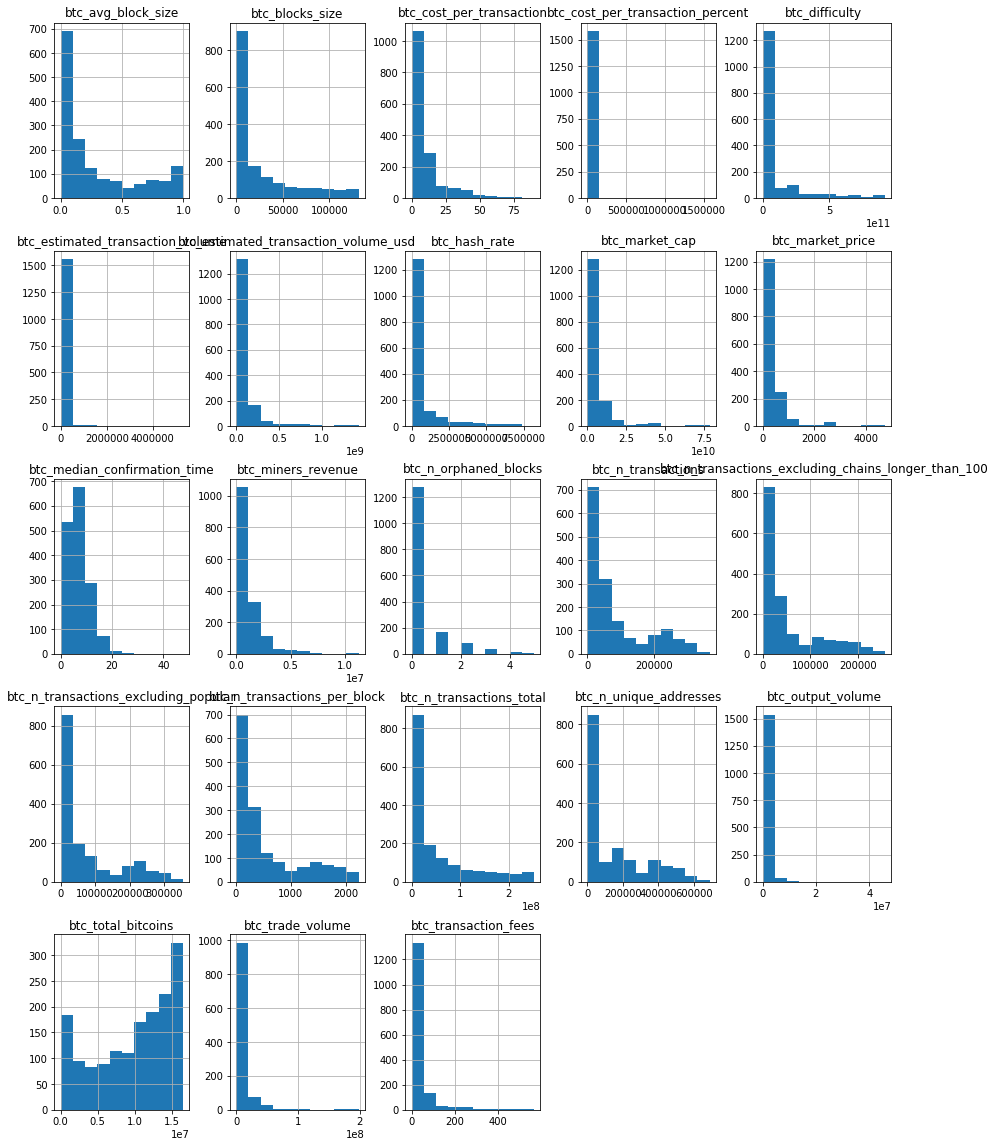

<Figure size 432x288 with 0 Axes>

In [17]:
# plot using histograms
df.hist(figsize=(15,20))
plt.figure()